Steps

In [ ]:
# 1.Import libraries
# 2.import the dataset
# 3.Perform Data analysis(DM,DE,DC,DV,EDA)
# 4.Feature Scaling [optional]
# 5.Encoding
# 6.Feature Selection
# 7.Choosing the model -Logistic Regression
# 8.Split the data-CV
# 9.Training the model
# 10.Test the model
# 11.Performance-Confusion metric.

.Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import confusion_matrix

import the dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

3.Perform Data analysis(DM,DE,DC,DV,EDA)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

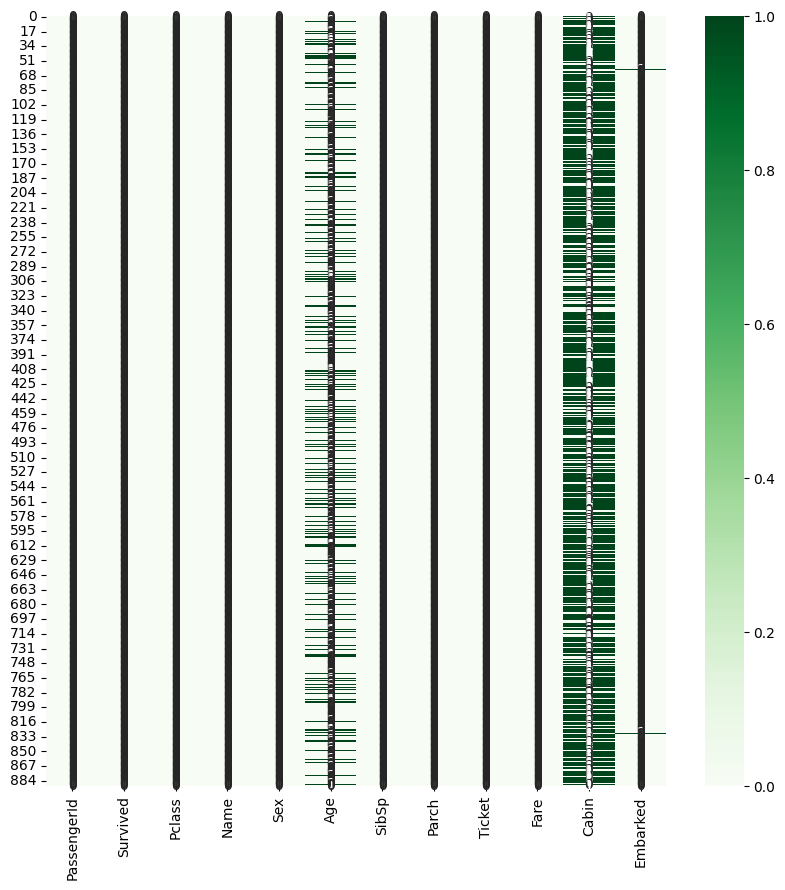

In [ ]:
#heatmap for null values
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),annot=True,cmap='Greens')
plt.show()

In [ ]:
#Age % of null values
print((df.Age.isnull().sum()/len(df.Age))*100)

19.865319865319865


In [ ]:
#Cabin % of null values
print((df.Cabin.isnull().sum()/len(df.Cabin))*100)

77.10437710437711


In [ ]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
#Drop the column Cabin since we cannot predict the NaN values exactly
df.drop('Cabin',axis=1,inplace=True)
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [ ]:
#Different Categories in Embarked feature
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
#Show the row where the Embarked is null
print(df[df.Embarked.isnull()])



     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Embarked  
61   female  38.0      0      0  113572  80.0      NaN  
829  female  62.0      0      0  113572  80.0      NaN  


In [ ]:
df[['Pclass','Embarked']]

,Pclass,Embarked
0,3,S
1,1,C
2,3,S
3,1,S
4,3,S
...,...,...
886,2,S
887,1,S
888,3,S
889,1,C


In [ ]:
#Mean of Age column
print('Mean:',df.Age.mean())

Mean: 29.69911764705882


In [ ]:
#Mode of Age column
print('Mode:',df.Age.mode())

Mode: 0    24.0
Name: Age, dtype: float64


In [ ]:
#Median of Age column
print('Median:',df.Age.median())

Median: 28.0


<Axes: ylabel='Age'>

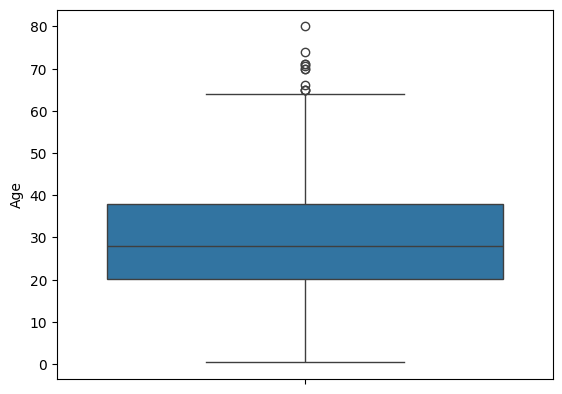

In [ ]:
#Plot a boxplot to find out the outliers int the Age Column
sns.boxplot(df.Age)

In [ ]:
#Fill all the null values in teh Age column with its median value
df.Age.fillna(value=df.Age.median(),inplace=True)

In [ ]:
#Now we can Drop the rows where Embarked is NaN
df.dropna(inplace=True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
None


In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df.shape

(889, 11)

In [ ]:
#Drop off the PassengerId,Name,Ticket
df.drop(columns=['PassengerId','Name','Ticket'],inplace=True,axis=1)

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

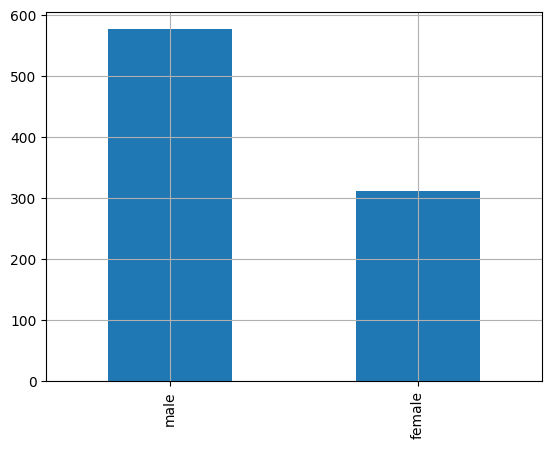

In [ ]:
#Plot a graph :Strength of Male V/s Strength of Female
df.Sex.value_counts().plot.bar(df.Sex)
plt.grid()

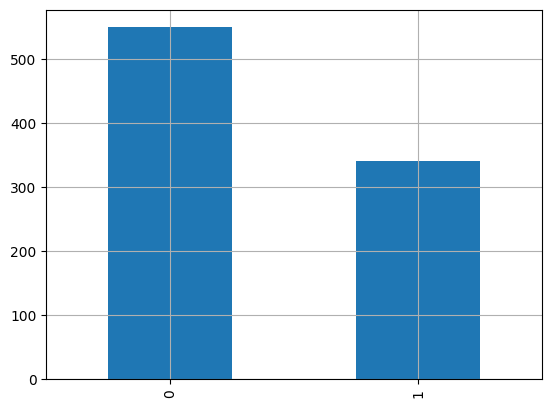

In [ ]:
#Plot a graph :Strength of Survived V/s Strength of not Survived
df.Survived.value_counts().plot.bar(df.Survived)
plt.grid()

Axes(0.125,0.11;0.775x0.77)


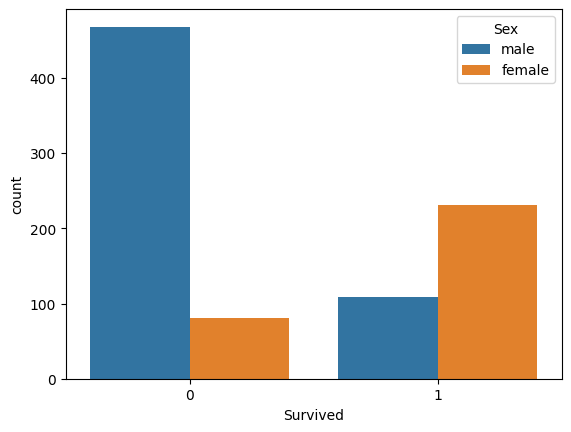

In [ ]:
#Plot a graph to find out the survival and non-survival w.r.t Sex
print(sns.countplot(x='Survived',data=df,hue='Sex'))

Axes(0.125,0.11;0.775x0.77)


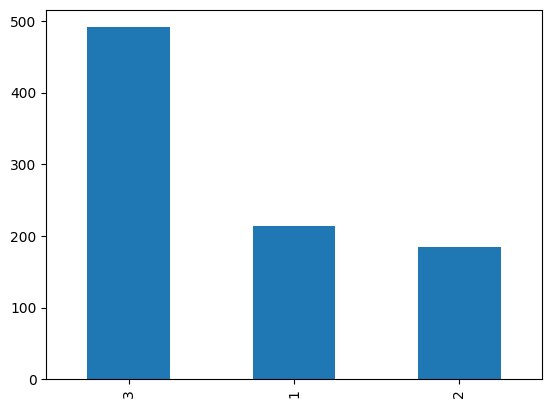

In [ ]:
#Plot a graph to find out the strength of the Pclass
print(df.Pclass.value_counts().plot.bar(df.Pclass))

Axes(0.125,0.11;0.775x0.77)


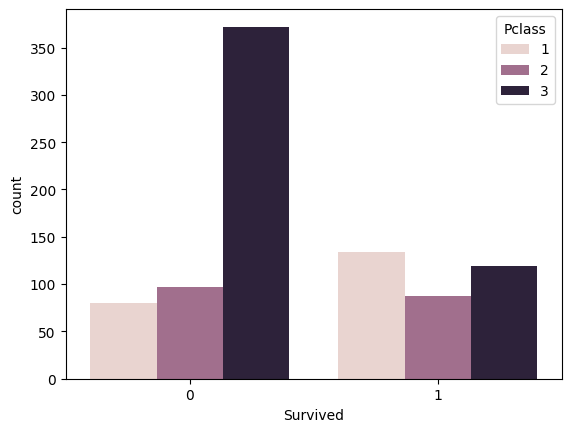

In [ ]:
#Plot a graph to find out the survival and non-survival w.r.t Pclass
print(sns.countplot(x='Survived',data=df,hue='Pclass'))

In [ ]:
#Change the dtype of Age Column
df['Age'] = df['Age'].astype('int')

In [ ]:
#Chnage the Fare upto 2 decimal places
df['Fare'] = round(df['Fare'],2)

In [ ]:
#Encoders - To convert data into numerical form

from sklearn.preprocessing import LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

In [ ]:
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    int64  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 62.5+ KB


In [ ]:
#One Hot encoding for the column Embarked
newdf = df.copy()
new = df.copy()

In [ ]:
df =pd.concat([df,pd.get_dummies(df['Embarked'])],axis=1)


In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22,1,0,7.25,S,0,0,1
1,1,1,0,38,1,0,71.28,C,1,0,0
2,1,3,0,26,0,0,7.92,S,0,0,1
3,1,1,0,35,1,0,53.10,S,0,0,1
4,0,3,1,35,0,0,8.05,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13.00,S,0,0,1
887,1,1,0,19,0,0,30.00,S,0,0,1
888,0,3,0,28,1,2,23.45,S,0,0,1
889,1,1,1,26,0,0,30.00,C,1,0,0


In [ ]:
df.S= df['S'].astype('Int32')
df.Q= df['Q'].astype('Int32')
df.C= df['C'].astype('Int32')

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22,1,0,7.25,S,0,0,1
1,1,1,0,38,1,0,71.28,C,1,0,0
2,1,3,0,26,0,0,7.92,S,0,0,1
3,1,1,0,35,1,0,53.10,S,0,0,1
4,0,3,1,35,0,0,8.05,S,0,0,1


In [ ]:
df.drop(['Embarked','C'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S'], dtype='object')

#Feature Importance/Featuree selection

In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22,1,0,7.25,0,1
1,1,0,38,1,0,71.28,0,0
2,3,0,26,0,0,7.92,0,1
3,1,0,35,1,0,53.10,0,1
4,3,1,35,0,0,8.05,0,1
...,...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.00,0,1
887,1,0,19,0,0,30.00,0,1
888,3,0,28,1,2,23.45,0,1
889,1,1,26,0,0,30.00,0,0


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
feat = ExtraTreesClassifier()
feat.fit(X,y)

ExtraTreesClassifier()

In [ ]:
feat.feature_importances_

array([0.10631271, 0.28979663, 0.24346113, 0.04655995, 0.04402454,
       0.23980975, 0.0085942 , 0.02144108])

In [ ]:
feat_imp = pd.Series(feat.feature_importances_,index=X.columns)

<Axes: >

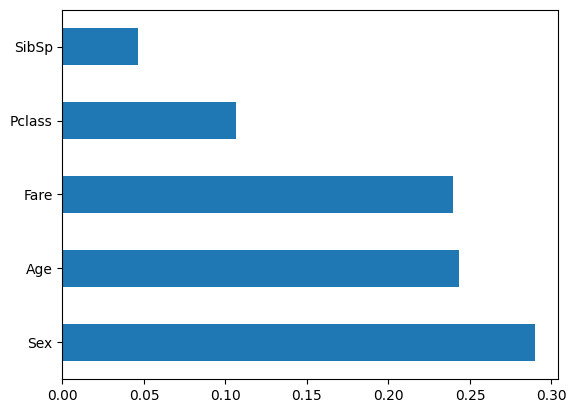

In [ ]:
feat_imp.nlargest(5).plot(kind='barh')

#Splitting the data

In [ ]:
skf = StratifiedKFold(n_splits=5)

In [ ]:
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index],X.iloc[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]

#Model Selection

In [ ]:
Classifier = LogisticRegression()

In [ ]:
#Train the model
Classifier.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Test the model
y_pred = Classifier.predict(X_test)

In [ ]:
y_pred

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0])

In [ ]:
final = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
print(final.head())

     Actual  Predicted
706       1          1
707       1          0
708       1          1
709       1          0
710       1          1


<Axes: >

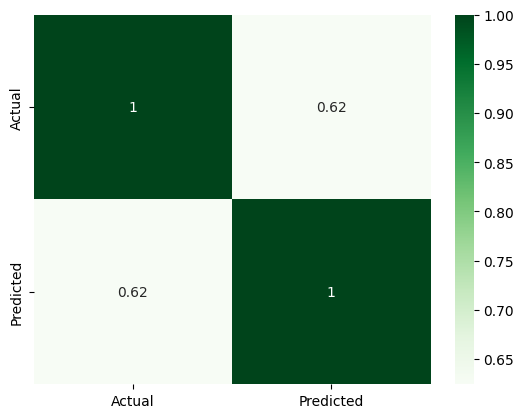

In [ ]:
sns.heatmap(final.corr(),annot=True,cmap='Greens')

#Performance metric - Confusion matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[98, 11],
       [20, 48]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.90      0.86       109\n           1       0.81      0.71      0.76        68\n\n    accuracy                           0.82       177\n   macro avg       0.82      0.80      0.81       177\nweighted avg       0.82      0.82      0.82       177\n'

In [ ]:
from sklearn.metrics import accuracy_score

Performance of the model/Accuracy

In [ ]:
accuracy_score(y_test,y_pred)

0.8248587570621468